In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Data Collection and Processing

In [4]:
#loading the csv data to pandas DataFrame
gold_data = pd.read_csv("gld_price_data.csv")

In [6]:
#print 5 rows in the DataFrame
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
#print the last 5 rows in the DataFrame
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
#number of rows and columns in the  DataFrame
gold_data.shape

(2290, 6)

In [9]:
#getting some information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
#checking the number of missing value
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
#getting the statistical measure of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Correlation:
    1.Positive correlation
    2.Nagative correlation

In [13]:
correlation = gold_data.corr()

C:\Users\dell\AppData\Local\Temp\ipykernel_15836\1828644926.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

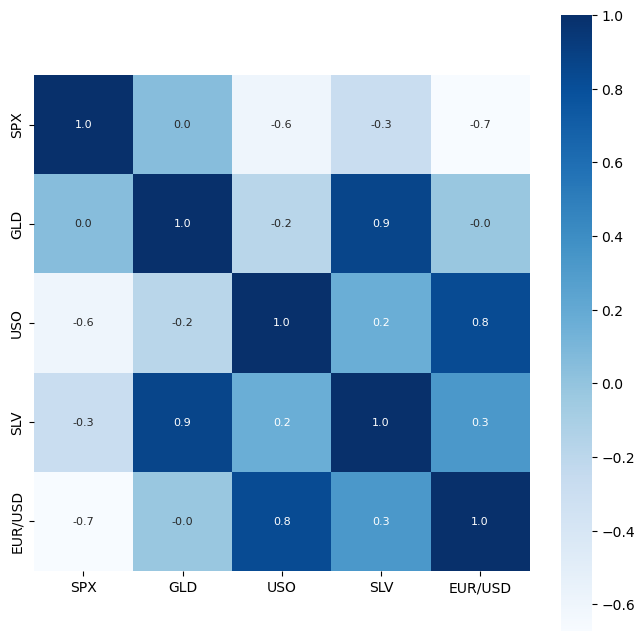

In [17]:
#construction a heatmap to understand the correlations
plt.figure(figsize = (8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt=".1f",annot=True,annot_kws={"size":8},cmap="Blues")

In [18]:
#correlations value of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\dell\AppData\Local\Temp\ipykernel_15836\1557196357.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data["GLD"],color="red")


<Axes: xlabel='GLD', ylabel='Density'>

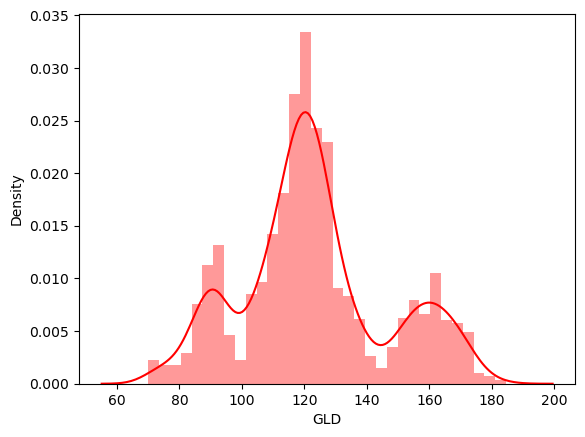

In [20]:
#checking the distribution of the GLD price
sns.distplot(gold_data["GLD"],color="red")

# Splitting the Feautures and Target

In [25]:
X = gold_data.drop(["Date","GLD"],axis=1)
Y = gold_data["GLD"]

In [26]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [27]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Splitting the Training data and Test data

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=2)

# Model Trainning  :  Random Forest Regressor

In [30]:
regressor = RandomForestRegressor(n_estimators=100)

In [32]:
#Training the model 
regressor.fit(X_train,Y_train)

RandomForestRegressor()

# Model Evaluation

In [38]:
#prediction the test data
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.62439942  82.18059977 116.30529966 127.65930099 120.65160104
 154.6866972  150.12909891 126.17150001 117.504699   125.99470052
 116.73090084 171.86290083 142.09739872 167.79559785 115.18810009
 117.5383005  138.43420351 169.9988     159.70710318 158.82779972
 155.12730005 125.52040006 175.43090006 156.86690247 125.18540023
  93.68819961  77.0997004  120.58560019 119.14359951 167.45120008
  88.01460052 125.20890019  91.2344008  117.76030019 121.00569947
 136.91120107 115.39570122 114.77090076 148.2448     107.02960091
 104.34770244  87.10799785 126.46920041 118.08970012 153.99489884
 119.65029976 108.43639989 107.96239795  93.17450071 127.14329785
  74.94000024 113.60109921 121.50820035 111.16689923 118.88349898
 120.73239936 159.14400045 168.7431009  147.27229659  85.74359859
  94.39100029  86.83309896  90.5588004  119.02980046 126.52960094
 127.52079982 170.10039987 122.31649967 117.60309927  98.28430022
 168.33730077 143.61929846 131.3810017  121.14620199 120.98479918
 119.74610

In [41]:
#R squred error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R error score :",error_score)

R error score : 0.9894860930700307


# Compare the Actual values and Prediction values in a plot

In [42]:
Y_test = list(Y_test)

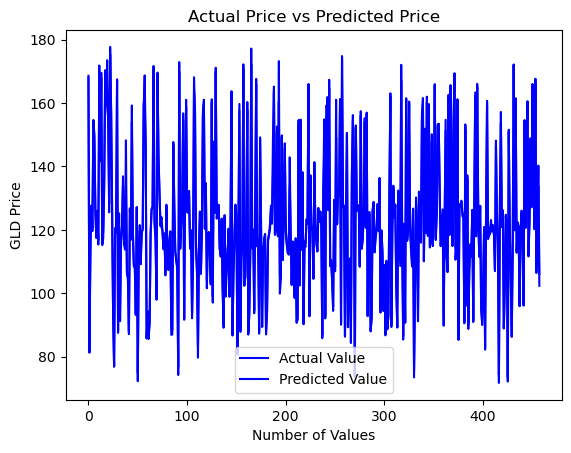

In [44]:
plt.plot(Y_test,color="blue",label="Actual Value")
plt.plot(test_data_prediction,color="blue",label="Predicted Value")
plt.title("Actual Price vs Predicted Price")
plt.xlabel("Number of Values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()